<a href="https://colab.research.google.com/github/anujbhandari2/ECS171-Final-Project/blob/main/ECS171FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-a7175b65ae08>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


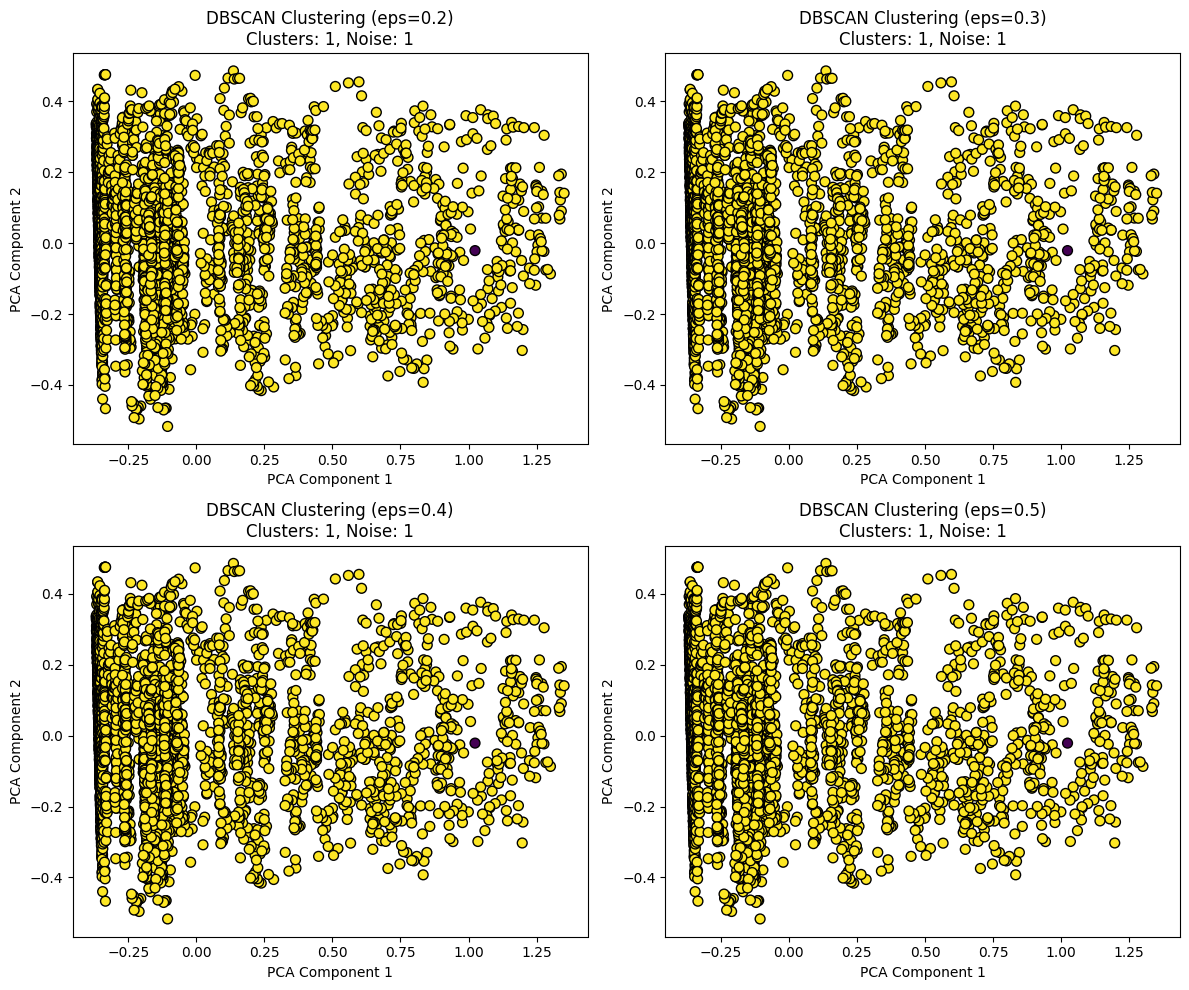

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

df = pd.read_csv('BTC-USD.csv')
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)

df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()

def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0.0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0.0)).rolling(window=window).mean()
    rs = gain / (loss + 1e-8)
    return 100.0 - (100.0 / (1.0 + rs))

df['RSI_14'] = compute_rsi(df['Close'], 14)
df.fillna(method='bfill', inplace=True)

# Features for clustering
feature_cols = ['Close', 'Volume', 'SMA_7', 'EMA_14', 'RSI_14']
df_features = df[feature_cols].copy()

# Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_features)

# Experimenting with different eps values
eps_values = [0.2, 0.3, 0.4, 0.5]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(df_scaled)

    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)

    # Plot results
    axes[i].scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
    axes[i].set_title(f'DBSCAN Clustering (eps={eps})\nClusters: {n_clusters}, Noise: {n_noise}')
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

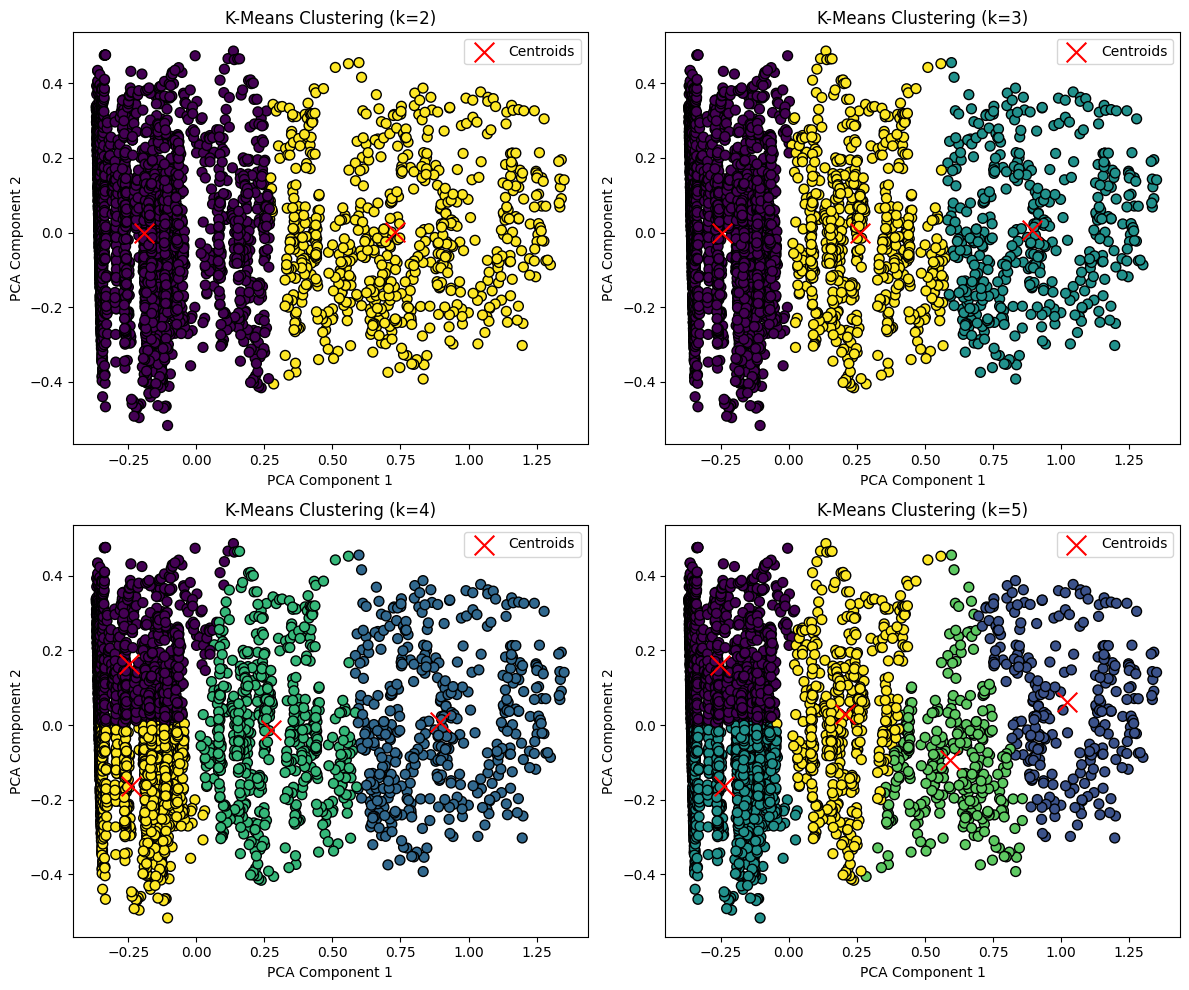

In [ ]:
from sklearn.cluster import KMeans

#KMeans
k_values = [2, 3, 4, 5]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)

    #Transform centroids using PCA
    centroids_pca = pca.transform(kmeans.cluster_centers_)

    #Plot results
    axes[i].scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
    axes[i].scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')
    axes[i].set_title(f'K-Means Clustering (k={k})')
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
            Date          Open          High           Low         Close  \
3223  2023-07-15  30331.783203  30407.781250  30263.462891  30295.806641   
3224  2023-07-16  30297.472656  30437.560547  30089.669922  30249.132813   
3225  2023-07-17  30249.626953  30336.400391  29685.783203  30145.888672   
3226  2023-07-18  30147.070313  30233.656250  29556.427734  29856.562500   
3227  2023-07-20  29919.064453  30224.115234  29918.281250  30189.902344 

In [ ]:
df['SMA_7'] = df['Close'].rolling(window=7).mean()

# Example: 14-day EMA
df['EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()

def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0.0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0.0)).rolling(window=window).mean()
    rs = gain / (loss + 1e-8)
    return 100.0 - (100.0 / (1.0 + rs))

df['RSI_14'] = compute_rsi(df['Close'], 14)

df.fillna(method='bfill', inplace=True)


feature_cols = ['Close', 'Volume', 'SMA_7', 'EMA_14', 'RSI_14']

df_features = df[feature_cols].copy()
df_features.head()

<ipython-input-11-c79877d0cac1>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,Close,Volume,SMA_7,EMA_14,RSI_14
0,457.334015,21056800,417.462572,457.334015,31.997433
1,424.440002,34483200,417.462572,452.948147,31.997433
2,394.795990,37919700,417.462572,445.194526,31.997433
3,408.903992,36863600,417.462572,440.355788,31.997433
4,398.821014,26580100,417.462572,434.817818,31.997433


In [ ]:
n_samples = len(df_features)

train_size = int(n_samples * 0.8)
val_size = int(n_samples * 0.1)
test_size = n_samples - train_size - val_size

train_df = df_features.iloc[:train_size]
val_df   = df_features.iloc[train_size:train_size+val_size]
test_df  = df_features.iloc[train_size+val_size:]

print("Train set:", train_df.shape)
print("Val set:  ", val_df.shape)
print("Test set: ", test_df.shape)

Train set: (2582, 5)
Val set:   (322, 5)
Test set:  (324, 5)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df.values)

# transform train, validation, and test sets using the fitted scaler
train_scaled = scaler.transform(train_df.values)
val_scaled   = scaler.transform(val_df.values)
test_scaled  = scaler.transform(test_df.values)

train_scaled_df = pd.DataFrame(train_scaled,
                               columns=feature_cols,
                               index=train_df.index)
val_scaled_df   = pd.DataFrame(val_scaled,
                               columns=feature_cols,
                               index=val_df.index)
test_scaled_df  = pd.DataFrame(test_scaled,
                               columns=feature_cols,
                               index=test_df.index)

# Check range
print("Min of train data after scaling:", train_scaled_df.min())
print("Max of train data after scaling:", train_scaled_df.max())

Min of train data after scaling: Close     0.0
Volume    0.0
SMA_7     0.0
EMA_14    0.0
RSI_14    0.0
dtype: float64
Max of train data after scaling: Close     1.0
Volume    1.0
SMA_7     1.0
EMA_14    1.0
RSI_14    1.0
dtype: float64


In [ ]:
def make_windows(data, window_size=30, horizon=1):
    """
    Create sliding windows from ts data.

    Parameters:
     - data: NumPy array of shape (num_samples, num_features)
     - window_size: how many past time steps used as input
     - horizon: how many future time steps to predict
    Returns: X, y
     - X: (num_samples, window_size, num_features)
     - y: (num_samples, horizon) -> for multi-step, or (num_samples,) if horizon=1
    """
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i: i+window_size])
        y.append(data[i+window_size: i+window_size+horizon, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

window_size = 30 
horizon = 1 

X_train, y_train = make_windows(train_scaled, window_size=window_size, horizon=horizon)
X_val,   y_val   = make_windows(val_scaled,   window_size=window_size, horizon=horizon)
X_test,  y_test  = make_windows(test_scaled,  window_size=window_size, horizon=horizon)

print("Train shape:", X_train.shape, y_train.shape)
print("Val shape:  ", X_val.shape,   y_val.shape)
print("Test shape: ", X_test.shape,  y_test.shape)

y_train = y_train.reshape(-1)
y_val   = y_val.reshape(-1)
y_test  = y_test.reshape(-1)

print("Shapes after reshape y:", y_train.shape, y_val.shape, y_test.shape)

Train shape: (2552, 30, 5) (2552, 1)
Val shape:   (292, 30, 5) (292, 1)
Test shape:  (294, 30, 5) (294, 1)
Shapes after reshape y: (2552,) (292,) (294,)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom pytorch dataset for ts data
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        """
        Initializes the dataset.

        Parameters:
         - X: NumPy array - Input sequences
         - y: NumPy array - Target values
        """
        self.X = X
        self.y = y

    def __len__(self):
        """Returns the total number of samples in the dataset."""
        return len(self.X)

    def __getitem__(self, idx):
        """Retrieves the input and target values at a given index."""
        return self.X[idx], self.y[idx]

X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset   = TimeSeriesDataset(X_val,   y_val)
test_dataset  = TimeSeriesDataset(X_test,  y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

# Fetch a single batch to confirm shapes
batch = next(iter(train_loader))
print("Batch X shape:", batch[0].shape)
print("Batch y shape:", batch[1].shape)

Batch X shape: torch.Size([32, 150])
Batch y shape: torch.Size([32])


Validation MSE: 0.0038387417242737665
Validation MAE: 0.051864556138364756
Test MSE: 0.002232705128835137
Test MAE: 0.04223373823083438


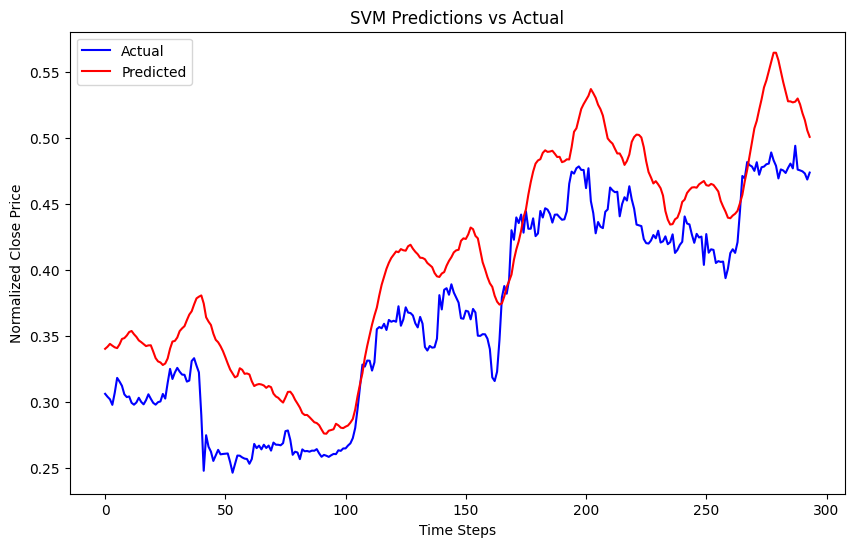

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

#SVM model
svm_model.fit(X_train, y_train)

y_val_pred = svm_model.predict(X_val)

val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")
print(f"Validation MAE: {val_mae}")

#Predict on the test set
y_test_pred = svm_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Close Price')
plt.title('SVM Predictions vs Actual')
plt.legend()
plt.show()